In [29]:
import plotly.express as px
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from numpy import alen, arange
import math
from math import sqrt
from sklearn.model_selection import KFold
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import LeaveOneOut
from sklearn.ensemble import AdaBoostRegressor
from sklearn.pipeline import make_pipeline
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import VotingRegressor

from sklearn.svm import SVR
from sklearn.model_selection import cross_val_predict
from sklearn.metrics import mean_squared_error, r2_score
from scipy.signal import savgol_filter
from sklearn.preprocessing import StandardScaler
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from scipy.signal import savgol_filter
import seaborn as sns

In [30]:
#BPSO
from sklearn import linear_model
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
# Create an instance 
#reg = linear_model.LinearRegression

# Define objective function
def f_per_particle(m, alpha):
    
    total_features = dimensions
    # Get the subset of the features from the binary mask

    #X_sav = savgol_filter(X_train, 3, polyorder=2, deriv=1)

    if np.count_nonzero(m) == 0:
        X_subset = X_train
    else:
        X_subset = X_train[:,m==1]

    regr = make_pipeline(StandardScaler(), SVR())
    y_pred = cross_val_predict(regr, X_subset, y_train_oleo, cv=10)
    r2cv = r2_score(y_train_oleo, y_pred)
    P = r2cv

    # Compute for the objective function
    j = (alpha * (1.0 - P)
        + (1.0 - alpha) * (1 - (X_subset.shape[1] / total_features)))

    return j

def f(x, alpha=0.88):

    n_particles = x.shape[0]
    j = [f_per_particle(x[i], alpha) for i in range(n_particles)]
    return np.array(j)

def snv(input_data):
  
    # Define a new array and populate it with the corrected data  
    output_data = np.zeros_like(input_data)
    for i in range(input_data.shape[0]):
 
        # Apply correction
        output_data[i,:] = (input_data[i,:] - np.mean(input_data[i,:])) / np.std(input_data[i,:])
 
    return output_data

In [31]:
df = pd.read_excel(open('../Data/Mangos/Spectra datasets NIRS_intact_mangos.xlsx', 'rb'),
              sheet_name='Raw Spectra data') 
df2 = pd.read_excel(open('../Data/Mangos/Spectra datasets NIRS_intact_mangos.xlsx', 'rb'),
              sheet_name='TA and Vit C') 
df2 = df2.iloc[:,:3]
df = pd.merge(df, df2, left_index=True, right_index=True)

In [32]:
df.drop(columns=['No'], inplace=True)
df.head()

,No.,variety,999.9,1000.3,1000.7,1001.1,1001.4,1001.8,1002.2,1002.6,...,2483.5,2485.8,2488.2,2490.6,2493,2495.4,2497.8,2500.2,TA (mg/100gr FM),Vit C (mg/100gr FM)
0,1,Kent,0.428519,0.427882,0.427481,0.427315,0.427002,0.426289,0.425939,0.425540,...,1.585399,1.586905,1.587933,1.589149,1.590033,1.591012,1.591306,1.591581,268.56,29.95
1,2,Kent,0.455501,0.454918,0.454001,0.453701,0.453563,0.453152,0.452960,0.452852,...,1.455168,1.455935,1.456416,1.457003,1.457670,1.458605,1.459040,1.459716,291.07,31.36
2,3,Kent,0.429935,0.429312,0.429004,0.428822,0.428090,0.427227,0.427130,0.427362,...,1.509284,1.510514,1.511341,1.512626,1.513753,1.514989,1.515703,1.515965,378.17,33.07
3,4,Kent,0.417054,0.416565,0.416097,0.415913,0.415398,0.414692,0.414409,0.413956,...,1.583658,1.585719,1.586842,1.587910,1.588926,1.589898,1.590328,1.591335,276.55,30.63
4,5,Kent,0.433239,0.432622,0.432626,0.432379,0.431620,0.430710,0.430836,0.430847,...,1.604524,1.605982,1.606778,1.607837,1.608756,1.609967,1.610900,1.611099,324.40,31.69


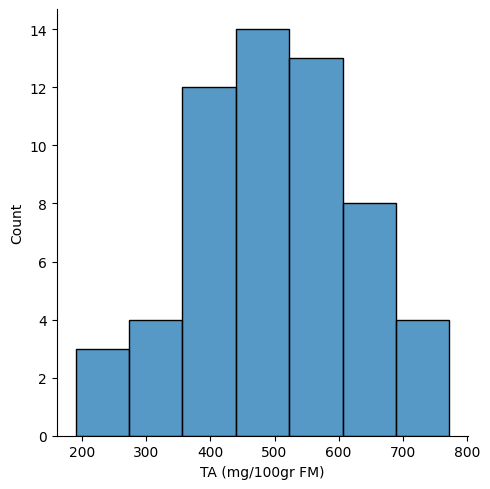

In [33]:
sns.displot(df['TA (mg/100gr FM)'])

In [34]:
x_feature = df.columns[2:-2].to_numpy()

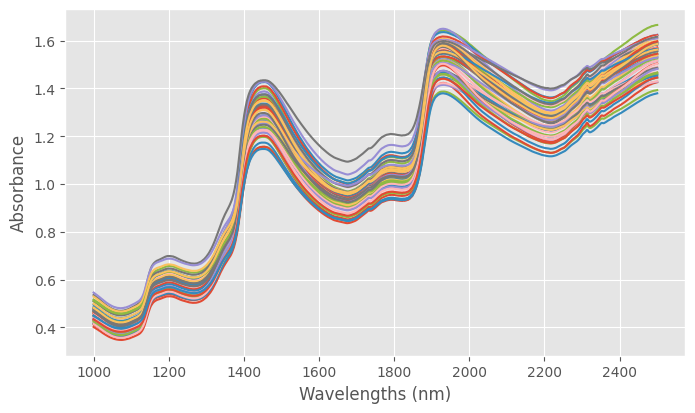

In [35]:
wl = np.arange(0, 1557, 1)
plt.figure(figsize=(8, 4.5))
with plt.style.context('ggplot'):
    plt.plot(x_feature, df.iloc[:,2:-2].values.T)
    plt.xlabel("Wavelengths (nm)")
    plt.ylabel("Absorbance")
    plt.show()

In [36]:
df_pretreat = df.iloc[:, 2:-2]
df_pretreat['TA'] = df['TA (mg/100gr FM)']
df_pretreat['C'] = df['Vit C (mg/100gr FM)']
df_pretreat['class'] = (df_pretreat['TA']/100).astype(int)

for index, row in df_pretreat.iterrows():
    if row['class']== 1:
        df_pretreat.loc[index, 'class'] = 2

In [37]:
y = df_pretreat[['TA','C','class']]
X = df_pretreat.values[:, :-3]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.15, random_state=0,stratify=y['class'])


y_train_oleo = y_train['TA']
y_test_oleo = y_test['TA']



In [38]:
#Data Preprocessing

X_train = snv(X_train)
X_test = snv(X_test)

X_train = savgol_filter(X_train, 3, polyorder=2, deriv=1)
X_test = savgol_filter(X_test, 3, polyorder=2, deriv=1)





In [39]:
X_train.shape[1]
wl_list = np.arange(0, 1557, 1)
wl_list1 = np.arange(0, 1557, 1)

In [ ]:
# Import PySwarms
import pyswarms as ps

# Initialize swarm, arbitrary
options = {'c1': 2, 'c2': 2, 'w':1, 'k': 20, 'p':1}

# Call instance of PSO
dimensions = X_train.shape[1] # dimensions should be the number of features
optimizer = ps.discrete.BinaryPSO(n_particles=30, dimensions=dimensions, options=options)
l_col=[]
best = 10
best1 = 15
n=0
while best < best1 :
    
        if n >0 :
            if n >1 :
                ## Get the selected features at iteration i-1
                X_train1 = (np.delete(X_train1, m_array1,1))
                X_test1 = (np.delete(X_test1, m_array1,1))
                wl_list1 = np.delete(wl_list1, m_array1)
                m_array1 = m_array
            if n ==1 :
                X_train1 = X_train
                X_test1 = X_test
                m_array1 = m_array

            ## Get the selected features at iteration i
            X_train = (np.delete(X_train, m_array,1))
            X_test = (np.delete(X_test, m_array,1))
            dimensions = X_train.shape[1]
            options = {'c1': 2, 'c2': 2, 'w':1, 'k': 20, 'p':1}
            optimizer = ps.discrete.BinaryPSO(n_particles=30, dimensions=dimensions, options=options)
            best1 = best
            ##Save the selected features at iteration i-1
            
            
            

        # if  X_train.shape[1]<30:
        #     opt_comp = 3
        #     options = {'c1': 0.5, 'c2': 0.5, 'w':0.9, 'k': 20, 'p':1}
        #     optimizer = ps.discrete.BinaryPSO(n_particles=20, dimensions=dimensions, options=options)
        

        if X_train.shape[1] < 20:
            break

        # Perform optimization
        cost, pos = optimizer.optimize(f, iters=100, verbose=2)
        optimizer.reset()
        best = round(cost,3)
        print(best)            
        m_array = np.where(pos == 0)
        print(X_train.shape)
        print(n)
        wl_list = np.delete(wl_list, m_array)
        n +=1  
        

    


In [ ]:
from sklearn.pipeline import make_pipeline
from sklearn.ensemble import RandomForestRegressor

regr = make_pipeline(StandardScaler(),  SVR())
cv = LeaveOneOut()
X1 = X_train1 
X2 = X_test1

X = np.concatenate((X_train1, X_test1))
y = pd.concat([y_train, y_test], axis=0)

# Fit
regr.fit(X1, y_train_oleo)
# Cross-validation
y_cv = cross_val_predict(regr,X1, y_train_oleo, cv=cv)
y_pred = regr.predict(X2)
y_pred_tot = regr.predict(X)
# Calculate scores
score = r2_score(y_train_oleo, y_cv)
score_train = mean_squared_error(y_train_oleo, y_cv,squared=False)
score_test = mean_squared_error(y_test_oleo, y_pred,squared=False)
score_tot = r2_score(y['TA'], y_pred_tot)
score_rmse_tot = mean_squared_error(y['TA'], y_pred_tot,squared=False)


print('N Wave: ', X_train1.shape)
print('R2CV: ', score)
print('RMSECV: ', score_train)
print('RMSE test: ', score_test)


print('Pour comparaison')
print('R2: ', score_tot)
print('RMSE: ', score_rmse_tot)